# <span style="color:#FF7E00"><b>Imports</b></span>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
#jtplot.style(grid=False, figsize=(6, 4.5))

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <span style="color:orangered"><b>Functions for Operating</b></span>

In [3]:
#Function to assign each vector component a value from {-1,1} (signed representation)
def signed_values(x):
    return_val = x
    for i in range(0, x.shape[0]):
        if x[i] > 0:
            return_val[i] = 1
        else:
            return_val[i] = -1
    return return_val    
    

#Actually our matrix definition (in other words: our model) 
def hopfield_fit(samples): # dim = 32*32
    dim = samples.shape[1]
    matrix = np.zeros((dim, dim))    
    mean = np.sum([np.sum(t) for t in samples])/(len(samples)*dim) #77*10
    print("Mean:",mean)
    
    for x_unsigned in samples: 
        x = signed_values(x_unsigned)
        for i in range(0, dim-1):
            for j in range(i+1, dim):
                matrix[i, j] = (matrix[i, j] + x[i]*x[j]) - mean
                matrix[j, i] = (matrix[i, j])
    return matrix/dim
    

#Function of outputs of the model
    
def hopfield_result(matrix, y_unsigned, samples, max_iter=-1):
    dim = matrix.shape[0]
    checker = 0
    counter = 0
    y = signed_values(y_unsigned)
    z = np.zeros(dim)
    zi = z + 2
    
    if (max_iter != -1):
        max_it = max_iter 
    else:
        max_it = dim
    
    while ((checker==0) and (not (z == zi).all()) and counter<max_it):
        
        counter = counter + 1
        zi = z + 0

        for j in range(0, dim):
            d = 0
            for i in range(0, dim):
                d = d + matrix[i, j]*y[i]
            if d>0:
                z[j] = 1
            else:
                z[j] = -1
        y = z + 0
        for x_unsigned in samples:
            x = signed_values(x_unsigned)
            if np.array_equal(x, z):
                checker = 1          
    return z


#Function to make visualization more clear for more than one iteration
def iterations_progress(hopfield_matrix, data, training_data):
    results = np.zeros((9, training_data.shape[1]))
    size = int(training_data.shape[1]**(1/2))
    results[0] = hopfield_result(hopfield_matrix, data, training_data, max_iter = 1)
    plt.subplot(331)
    plt.imshow(results[0].reshape(size,size))
    for i in range(1, 9):
        results[i] = hopfield_result(hopfield_matrix, results[i-1], training_data, max_iter = 1)
        k = 330+i+1
        plt.subplot(k)
        plt.imshow(results[i].reshape(size,size))

In [4]:
def image_to_np(path):
    image = Image.open(path)
    np_vector = np.asarray(image)
    try:
        np_vector = np_vector[:, :, 0]
    except IndexError:
        pass
    np_vector = np.where(np_vector<128, -1, 1)
    np_vector = np_vector.reshape(np_vector.shape[0]**2)
    return np_vector

# <span style="color:#DC143C"><b>Data Input</b></span>

In [7]:
PATH = '/content/drive/MyDrive/ColabNotebooksJuanJosé/RedesNeuronalesITCG/data/digits'
TEST_PATH = '/content/drive/MyDrive/ColabNotebooksJuanJosé/RedesNeuronalesITCG/data/digits/test'

numbers_set = np.asarray([image_to_np(os.path.join(PATH, '0.jpg')),
                     image_to_np(os.path.join(PATH, '1.jpg')),
                     image_to_np(os.path.join(PATH, '2.jpg')),
                     image_to_np(os.path.join(PATH, '3.jpg')),
                     image_to_np(os.path.join(PATH, '4.jpg')),
                     image_to_np(os.path.join(PATH, '5.jpg')),
                     image_to_np(os.path.join(PATH, '6.jpg')),
                     image_to_np(os.path.join(PATH, '7.jpg')),
                     image_to_np(os.path.join(PATH, '8.jpg')),
                     image_to_np(os.path.join(PATH, '9.jpg'))])

test_vectors = np.asarray([image_to_np(os.path.join(TEST_PATH, 'test0.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test1.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test7.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test8_1.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test8_2.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test5.jpg')),
                          image_to_np(os.path.join(TEST_PATH, 'test99.png'))])


# <span style="color:#CD5C5C"><b>Testing the Results</b></span>

Mean: 0.1521484375


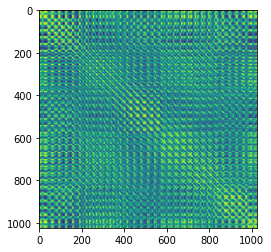

In [12]:
#Visual representation of our Hopfield matrix
training_data = numbers_set
hopfield_matrix = hopfield_fit(training_data)
plt.imshow(hopfield_matrix);

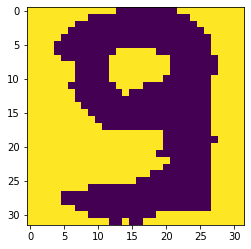

In [9]:
# Checking the results on Training Data
result = hopfield_result(hopfield_matrix, numbers_set[9], training_data, max_iter = 1)
plt.imshow(result.reshape(32,32));

Following 2 tests are peformed on test-vectors (from testing subset).

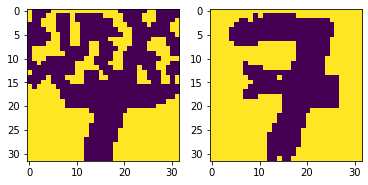

In [10]:
#Digit 7
#Result after one iteration
result = hopfield_result(hopfield_matrix, test_vectors[2], training_data, max_iter = 1)
plt.subplot(121)
plt.imshow(test_vectors[2].reshape(32,32))
plt.subplot(122)
plt.imshow(result.reshape(32,32))

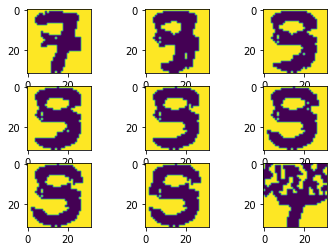

In [11]:
#8 Iterations (last image in the grid is the input)
iterations_progress(hopfield_matrix, test_vectors[2], training_data)# "8"
plt.imshow(test_vectors[2].reshape(32,32))

Here one can clearly see, that data tends to be corrupted the more iterations we have.

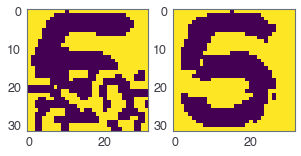

In [ ]:
##Digit 5
#Result after one iteration
result = hopfield_result(hopfield_matrix, test_vectors[5], training_data, max_iter = 1)
plt.subplot(121)
plt.imshow(test_vectors[5].reshape(32,32))
plt.subplot(122)
plt.imshow(result.reshape(32,32))

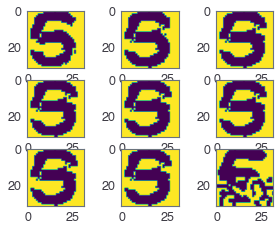

In [ ]:
#8 Iterations (last image in the grid is the input)
iterations_progress(hopfield_matrix, test_vectors[5], training_data)
plt.imshow(test_vectors[5].reshape(32,32))

Same situation as with the "7". The more iterations we have the more corrupted our results become.

The following test was performed in order to see how does system evaluate random vector (without any label in mind).

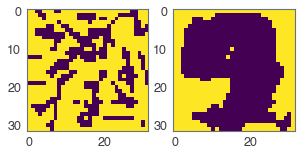

In [ ]:
#test99
#Result after one iteration
result = hopfield_result(hopfield_matrix, test_vectors[6], training_data, max_iter = 1)
plt.subplot(121)
plt.imshow(test_vectors[6].reshape(32,32))
plt.subplot(122)
plt.imshow(result.reshape(32,32))

# <span style="color:purple"><b>Subset of MNIST</b></span>

In [ ]:
mnist_PATH = '/Users/david/Desktop/hopfield-network/data/digits/mnist_subset'
mnist_TEST_PATH = '/Users/david/Desktop/hopfield-network/data/digits/mnist_subset/test'

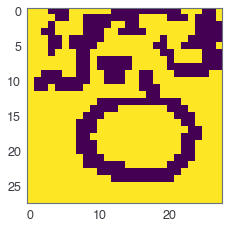

In [ ]:
files_names = np.array([str(t)+str(x)+".png" for t in range(10) for x in range(2)])
mnist_subset = -1*np.array([image_to_np(os.path.join(mnist_PATH, x)) for x in files_names])
#plt.imshow(mnist_subset[86].reshape(28,28))

test_mnist = -1*image_to_np(os.path.join(mnist_TEST_PATH, '84_test.png'))
plt.imshow(test_mnist.reshape(28,28))

Mean: 0.7326530612244898


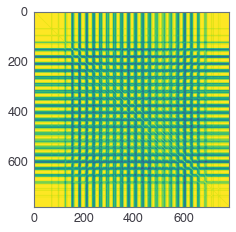

In [ ]:
#Visual representation of our Hopfield matrix
mnist_matrix = hopfield_fit(mnist_subset)
plt.imshow(mnist_matrix)

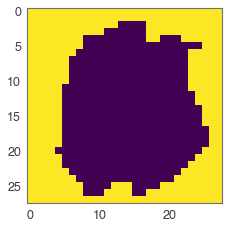

In [ ]:
#Supposed digit 8
#Result after one iteration
result = hopfield_result(mnist_matrix, test_mnist, mnist_subset, max_iter = 1)
plt.imshow(result.reshape(28,28))

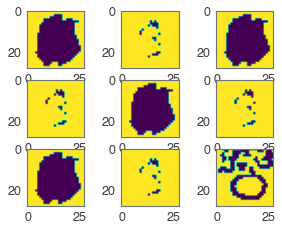

In [ ]:
#8 Iterations (last image in the grid is the input)
iterations_progress(mnist_matrix, test_mnist, mnist_subset)
plt.imshow(test_mnist.reshape(28,28))

Here we can clearly see that our model is overfitting. These results are due to the fact that MNIST Subset is just to big for Hopfield Network to "remember". There are also more than one (and different) instances of each digit.